In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Exercise 1

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])
n = 500
pi = 0.5

## a)

In [28]:
# sampling
Y_generative = np.array(n * [1] + n * [-1])
X_generative = np.append(np.random.multivariate_normal(m1, sigma, n), np.random.multivariate_normal(m2, sigma, n), axis = 0)

$$ p(x|y=1) \sim N(m_1, \Sigma) $$
$$ p(x|y=-1) \sim N(m_2, \Sigma) $$
$$ p(y=1) = p(y=-1) = \pi = 0.5$$
$$ p(x|y=1) = (2\pi)^{-k/2} det(\Sigma)^{-1/2}exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1)) $$
$$ p(x|y=1) = (2\pi)^{-k/2} det(\Sigma)^{-1/2}exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2)) $$

$$p(y=1|x) = \frac{p(x|y=1)p(y)}{p(x)} = \frac{p(x|y=1)p(y)}{p(x|y=-1)*p(y=-1) + p(x|y=1)*p(y=1)} = $$
$$ \frac{p(x|y=1)\pi}{p(x|y=-1)*\pi + p(x|y=1)*\pi} = \frac{p(x|y=1)}{p(x|y=-1) + p(x|y=1)} = $$
$$ \frac{exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))}{exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2)) + exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))} = $$
$$ \frac{1}{1 + \frac{exp(-\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2))}{exp(-\frac{1}{2}(x-m_1)'\Sigma^{-1}(x-m_1))}} = (*)$$

We have
$$ -\frac{1}{2}(x-m_2)'\Sigma^{-1}(x-m_2) = -\frac{1}{2}(x'\Sigma^{-1}x -2m_2\Sigma^{-1}x + m_2'\Sigma^{-1}m_2)$$

So
$$ (*) =  \frac{1}{1 + exp(-\frac{1}{2}( 2(m_1 - m_2 )\Sigma x - (m_2'\Sigma^{-1}m_2 - m_1'\Sigma^{-1}m_1)))}$$

Which shows that it is a logitic model

In [29]:
beta0 = np.log(pi/(1-pi)) + 1/2 * m2.T @ np.linalg.inv(sigma) @ m2 - 1/2 * m1.T @ np.linalg.inv(sigma) @ m1
beta0

-2.0

In [30]:
beta = np.linalg.inv(sigma) @ (m1-m2)
beta

array([2., 2.])

In [31]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_generative, Y_generative)

LogisticRegression(penalty=None)

In [32]:
mod_b.intercept_

array([-1.70834174])

In [33]:
mod_b.coef_

array([[1.6336962 , 1.81774237]])

Pretty close

## b)

In [9]:
beta0 = -2
beta = np.array([2,2])

In [10]:
randoms = np.random.binomial(1, 0.5, 2*n)
X = ((np.random.multivariate_normal(m1, sigma, 2*n).T * randoms) +\
(np.random.multivariate_normal(m2, sigma, 2*n).T * (1-randoms))).T

In [11]:
Y = np.random.binomial(1, 1/(1 + np.exp(-beta0 - beta @ X.T)))

In [12]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X, Y)

LogisticRegression(penalty=None)

In [14]:
mod_b.intercept_

array([-1.80657329])

In [13]:
mod_b.coef_

array([[1.78052114, 1.84825478]])

Pretty close

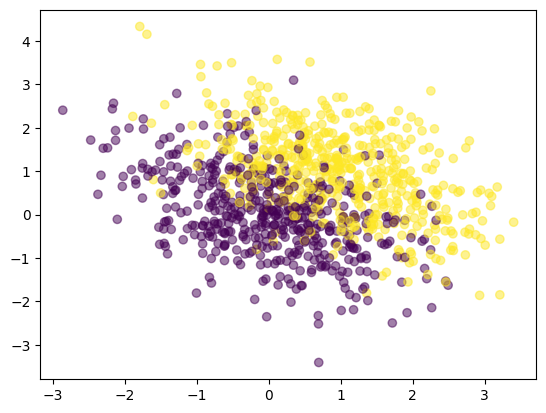

In [100]:
plt.scatter(X[:,0], X[:,1], c=Y, alpha=0.5)
plt.show()

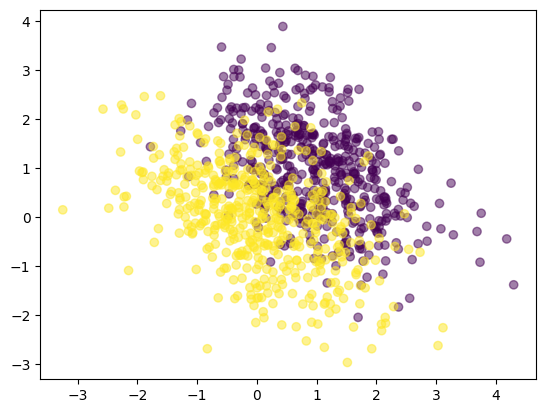

In [101]:
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative, alpha=0.5)
plt.show()

Very similar

## c)

$$ p(x | y = -1) = \frac{p(y=-1|x)p(x)}{p(y=-1)} = \frac{p(y=-1|x)(p(x|y=-1) * p(y=-1) + p(x|y=1) * p(y=1))}{p(y=-1)}$$ 

$$ \frac{p(y=-1|x)(p(x|y=-1)(1-\pi) + p(x|y=1)\pi)}{1-\pi} $$

$$ \frac{\pi}{1-\pi} \frac{p(y=-1|x)}{1 - p(y=-1|x)} p(x|y=1) $$

We know that $p(y=-1|x)$ comes from logistic model thus

$$ p(x|y=-1) = \frac{\pi}{1-\pi} exp(\beta_0 + \beta_1) \lambda exp(-\lambda x)$$

In this task

$$ p(x|y=-1) = \frac{1}{2} exp(-beta_0 - x)exp(-x) = \frac{1}{2} exp(beta_0)exp(-2x)$$

This needs to have integral = 1 and while $\frac{1}{2}exp(-\beta_0)$ is constant, we know that it is exponential distribution, thus

$$\frac{1}{2}exp(-\beta_0) = 2$$
$$ \beta_0 = -ln(4)$$

In [38]:
-np.log(4)

-1.3862943611198906